<a href="https://colab.research.google.com/github/Ahenrique-Langara/ChatGPT_Codex/blob/Dating-Assistant/Dating_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Steps

In [ ]:
#!pip install jupyter-dash
#!pip install dash dash-bootstrap-components

# **Inicializando o Ambiente**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks

 12.2_RNN_Keras_MovieLikelinessPrediction.ipynb   Dating_Assistant.ipynb
 airplane.jpg					  dog.jpg
'Andre Henrique - Final Exam.ipynb'		  ICBC_Crash_Data.pdf
 automobile.jpg					  Install.ipynb
 cat.jpg					  ReadDataFromGoogleDrive.ipynb
'Cópia de Andre Henrique - Final Exam.ipynb'	  truck.jpg
'Cópia de ReadDataFromGoogleDrive.ipynb'	  Untitled0.ipynb
 CPSC4830_Midterm2.ipynb			  Untitled1.ipynb
 crime.csv					  Untitled2.ipynb


In [ ]:
!ls drive/MyDrive/Colab\ Notebooks

 12.2_RNN_Keras_MovieLikelinessPrediction.ipynb   Dating_Assistant.ipynb
 airplane.jpg					  dog.jpg
'Andre Henrique - Final Exam.ipynb'		  ICBC_Crash_Data.pdf
 automobile.jpg					  Install.ipynb
 cat.jpg					  ReadDataFromGoogleDrive.ipynb
'Cópia de Andre Henrique - Final Exam.ipynb'	  truck.jpg
'Cópia de ReadDataFromGoogleDrive.ipynb'	  Untitled0.ipynb
 CPSC4830_Midterm2.ipynb			  Untitled1.ipynb
 crime.csv					  Untitled2.ipynb


# Importando Bibliotecas

In [ ]:
import gc

# Limpar variáveis no namespace global
def clear_namespace():
    for name in list(globals().keys()):
        if name not in ['pd', 'random', 'gc', 'clear_namespace']:
            del globals()[name]
    gc.collect()

# Limpar o ambiente ao iniciar
clear_namespace()

In [ ]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import tkinter as tk
from tkinter import simpledialog

from pandas import DataFrame
from pandas import concat
from math import sqrt
from numpy import concatenate
from datetime import datetime, timedelta

# Definindo Estrutura para categorizacao de usuarios

## Listas de suporte

In [ ]:
# Lista com todas as capitais brasileiras
capitais_brasileiras = [
    'São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Brasília', 'Salvador',
    'Fortaleza', 'Recife', 'Manaus', 'Belém', 'Curitiba',
    'Porto Alegre', 'Natal', 'São Luís', 'João Pessoa', 'Maceió',
    'Aracaju', 'Campo Grande', 'Cuiabá', 'Vitória', 'Palmas',
    'Boa Vista', 'Macapá', 'Porto Velho', 'Rio Branco', 'Teresina'
]

# Lista com possíveis tipos de preferência de localização
tipos_preferencia_localizacao = capitais_brasileiras

# Lista com possíveis interesses
interesses = [
    'Esportes','Música',
    'Cinema','Literatura',
    'Tecnologia','Viagens',
    'Culinária','Arte'
]

# Lista com possíveis gêneros
generos = ['Masculino', 'Feminino', 'Não-binário', 'Outro']

# Lista com possíveis tipos de relacionamento
tipos_relacionamento = ['Casado', 'Solteiro', 'Divorciado', 'Viúvo']

# Lista com possíveis tipos de ocupação
tipos_ocupacao = ['Engenheiro', 'Médico', 'Professor', 'Designer']

# Lista com possíveis tipos de educação
tipos_educacao = ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']

# Lista com possíveis tipos de preferência de idade
tipos_preferencia_idade = ['18-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Lista com possíveis tipos de fotos
tipos_fotos = ['Selfies', 'Paisagens', 'Eventos', 'Esportes', 'Viagens', 'Pessoas']

# Lista de possíveis tipos de ações
tipos_acoes = ['view', 'like', 'match', 'message_sent']

# Lista de locais e dispositivos, apenas como exemplo
tipos_dispositivos = ['mobile', 'desktop', 'tablet']


In [ ]:
# Função para gerar interesses aleatórios
def escolher_interesses_aleatorios(lista, num_interesses_opcional=(1, 2, 3)):
    # Decide aleatoriamente se deve escolher um, dois ou tres interesses
    num_interesses = random.choice(num_interesses_opcional)
    # Escolhe os interesses aleatórios
    interesses_selecionados = random.sample(lista, min(num_interesses, len(lista)))
    # Junta os interesses selecionados em uma única string
    return ', '.join(interesses_selecionados)

# Função para escolher aleatoriamente um ou dois tipos de fotos
def escolher_tipos_fotos_aleatorios(lista2, num_tipos_fotos_opcional=(1, 2, 3)):
    # Decide aleatoriamente se deve escolher um, dois ou tres tipos de fotos
    num_tipos_fotos = random.choice(num_tipos_fotos_opcional)
    # Escolhe os tipos de foto aleatoriamente
    tipos_fotos = random.sample(lista2, min(num_tipos_fotos, len(lista2)))
    return ', '.join(tipos_fotos)

# Gerando um timestamp aleatório nos últimos 30 dias
def gerar_timestamp_aleatorio():
    now = datetime.now()
    start_date = now - timedelta(days=30)
    random_date = start_date + timedelta(seconds=random.randint(0, int((now - start_date).total_seconds())))
    return pd.Timestamp(random_date)

# Função para gerar dados de ações temporais
def gerar_acoes_temporais(num_usuarios, num_acoes):
    acoes = []
    view_actions = {}  # Dicionário para rastrear as ações "view"

    while len(acoes) < (num_acoes):
        usuario_id = random.randint(1, num_usuarios)  # Seleciona um usuário aleatório
        acao_tipo = random.choice(tipos_acoes)
        timestamp = gerar_timestamp_aleatorio()
        target_user_id = None
        location = random.choice(capitais_brasileiras)
        device_type = random.choice(tipos_dispositivos)
        message_content = None
        foto_tipo = None
        time_since_view = None

        # Se a ação é "view", ela deve estar associada a um outro usuário
        if acao_tipo == 'view':
            target_user_id = random.randint(1, num_usuarios)
            view_actions[(usuario_id, target_user_id)] = timestamp

        # Se a ação é "like", verifique se houve uma ação "view" anterior
        elif acao_tipo == 'like':
            possible_targets = [(u, t) for (u, t), ts in view_actions.items() if u == usuario_id]
            if possible_targets:
                # Seleciona um alvo baseado em um "view" anterior
                selected_view = random.choice(possible_targets)
                target_user_id = selected_view[1]
                foto_tipo = random.choice(tipos_fotos) if random.random() < 0.5 else None # 50% de chance do like ser em uma foto Seleciona um tipo de foto aleatório
                time_since_view = (timestamp - view_actions[selected_view]).total_seconds()
            else:
                # Se não houve "view" anterior, pule essa iteração
                continue

        # Se a ação é "match", verifique se houve uma ação "view" anterior
        elif acao_tipo == 'match':
            possible_targets = [(u, t) for (u, t), ts in view_actions.items() if u == usuario_id]
            if possible_targets:
                # Seleciona um alvo baseado em um "view" anterior
                selected_view = random.choice(possible_targets)
                target_user_id = selected_view[1]
                time_since_view = (timestamp - view_actions[selected_view]).total_seconds()
            else:
                # Se não houve "view" anterior, pule essa iteração
                continue

        # Apenas para 'message_sent'
        elif acao_tipo == 'message_sent':
            target_user_id = random.randint(1, num_usuarios)
            message_content = "Mensagem de exemplo"

        acao = {
            'Action_ID': len(acoes) + 1,
            'User_ID': usuario_id,
            'Action_Type': acao_tipo,
            'Timestamp': timestamp,
            'Target_User_ID': target_user_id,
            'Location': location,
            'Device_Type': device_type,
            'Message_Content': message_content,
            'Photo_Type': foto_tipo,  # Adicionando o tipo de foto
            'Time_Since_View': time_since_view,  # Tempo entre "view" e "like"
            'Action_Duration': random.randint(5, 300)  # Duração aleatória entre 5 segundos e 5 minutos
        }
        # Adiciona a ação à lista
        acoes.append(acao)

    return pd.DataFrame(acoes)

## Definindo tabelas

In [ ]:
# Definindo os parâmetros das colunas da tabela de usuarios
colunas = [

            # Basic User Information
    'User_ID',               # Identificador único do usuário
    'Age',                   # Idade do usuário
    'Gender',                # Gênero do usuário
    'Location',              # Localização atual do usuário
    'Occupation',            # Ocupação ou profissão do usuário
    'Education',             # Nível educacional ou campo de estudo

            # Profile Content
    'Interests',             # Interesses e hobbies listados no perfil
    'Description_Length',    # Comprimento da descrição pessoal no perfil
    'Number_of_Photos',      # Número de fotos que o usuário adicionou ao perfil
    'Photo_Types',           # Tipos de fotos que o usuário colocou (ex.: selfies, natureza)
    'Profile_Quality',       # Qualidade geral do perfil (avaliação ou pontuação)
    'Photo_Quality',         # Qualidade das fotos do perfil (avaliação ou pontuação)

            # Relationship Preferences
    'Relationship_Type',     # Tipo de relacionamento desejado pelo usuário (ex.: casual, sério)
    'Preferred_Age',         # Faixa etária preferida para um parceiro
    'Preferred_Gender',      # Gênero preferido para um parceiro
    'Preferred_Location',    # Localização preferida para um parceiro
    'Preferred_Photo_Types', # Tipos de fotos preferidas (baseado nos likes dados pelo usuário)

            # Interaction Metrics
    'Profile_Views',         # Número de vezes que o perfil foi visualizado
    'Profiles_Viewed',       # Número de Perfis visualizados
    'Profiles_Liked',        # Número de Perfis curtidos
    'Messages_Sent',         # Número de mensagens enviadas pelo usuário
    'Messages_Received',     # Número de mensagens recebidas pelo usuário
    'Response_Rate'          # Taxa de resposta do usuário às mensagens recebidas

            # Colunas Cross-Reference
    'Profiles_Liked_IDs',           # IDs dos perfis que o usuário deu like
    'Profiles_Liked_By_Others_IDs', # IDs dos perfis que deram like neste usuário
    'Matches_IDs',                  # IDs dos perfis que deram match (like mútuo)
    'Number_of_Matches'             # Número total de matches (like mútuo)

            ]

In [ ]:
# Criando um DataFrame vazio com as colunas definidas
df = pd.DataFrame(columns=colunas)

In [ ]:
# Criacao de Perfis para teste
perfis = [] # Lista para acumular os perfis
for i in range(1, 1001):
    profiles_viewed = random.randint(250, 1000)
    # Escolher uma porcentagem aleatória entre 20% e 80%
    profiles_liked_percentage = random.uniform(0.2, 0.8)
    profiles_liked = max(1, int(profiles_viewed * profiles_liked_percentage))

    # Gerar IDs aleatórios para os perfis curtidos
    profiles_liked_ids = random.sample(range(1, 1001), profiles_liked)


    perfil = {
        'User_ID': i,
        'Age': random.randint(18, 65),
        'Gender': random.choice(generos),
        'Location': random.choice(capitais_brasileiras),
        'Occupation': random.choice(tipos_ocupacao),
        'Education': random.choice(tipos_educacao),
        'Interests': escolher_interesses_aleatorios(interesses),
        'Description_Length': random.randint(50, 200),
        'Number_of_Photos': random.randint(1, 10),
        'Photo_Types': escolher_tipos_fotos_aleatorios(tipos_fotos),
        'Profile_Quality': random.randint(1, 10),
        'Photo_Quality': random.randint(1, 10),
        'Relationship_Type': random.choice(tipos_relacionamento),
        'Preferred_Age': random.choice(tipos_preferencia_idade),
        'Preferred_Gender': random.choice(generos),
        'Preferred_Location': random.choice(tipos_preferencia_localizacao),
        'Preferred_Photo_Types': escolher_tipos_fotos_aleatorios(tipos_fotos),
        'Profile_Views': random.randint(10, 150),
        'Profiles_Viewed': profiles_viewed,
        'Profiles_Liked': profiles_liked,
        'Messages_Sent': random.randint(5, 30),
        'Messages_Received': random.randint(5, 30),
        'Response_Rate': round(random.uniform(0.5, 1.0), 2),
        'Profiles_Liked_IDs': profiles_liked_ids,
        'Profiles_Liked_By_Others_IDs': [],  # Preenchido posteriormente
        'Matches_IDs': [],  # Preenchido posteriormente
        'Number_of_Matches': 0  # Preenchido posteriormente
    }
    perfis.append(perfil) # Acumula cada perfil na lista

# Cria o DataFrame a partir da lista de perfis
df = pd.DataFrame(perfis)

In [ ]:
# Gerar um DataFrame de exemplo para ações temporais
acoes_df = gerar_acoes_temporais(num_usuarios=len(df), num_acoes=5000)

# Exibir o DataFrame gerado
display(acoes_df)

,Action_ID,User_ID,Action_Type,Timestamp,Target_User_ID,Location,Device_Type,Message_Content,Photo_Type,Time_Since_View,Action_Duration
0,1,983,view,2024-08-23 08:46:53.577836,396,Fortaleza,mobile,None,None,NaN,133
1,2,487,message_sent,2024-08-16 07:11:48.577871,846,Belo Horizonte,mobile,Mensagem de exemplo,None,NaN,28
2,3,559,view,2024-08-22 19:04:20.577895,260,Campo Grande,mobile,None,None,NaN,214
3,4,337,message_sent,2024-08-21 00:31:10.577997,926,Vitória,tablet,Mensagem de exemplo,None,NaN,285
4,5,496,message_sent,2024-08-26 19:53:41.578136,621,Porto Velho,mobile,Mensagem de exemplo,None,NaN,121
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,553,message_sent,2024-08-02 13:09:00.866352,270,Aracaju,tablet,Mensagem de exemplo,None,NaN,251
4996,4997,440,message_sent,2024-08-07 02:24:18.866362,800,Maceió,desktop,Mensagem de exemplo,None,NaN,215
4997,4998,624,view,2024-08-15 19:08:16.866372,133,Fortaleza,desktop,None,None,NaN,258
4998,4999,908,message_sent,2024-08-24 01:37:11.866382,21,Campo Grande,mobile,Mensagem de exemplo,None,NaN,129


In [ ]:
# Preenchendo as colunas de "Profiles_Liked_By_Others_IDs" e "Matches_IDs"
for idx, row in df.iterrows():
    user_id = row['User_ID']
    profiles_liked_ids = row['Profiles_Liked_IDs']

    for liked_id in profiles_liked_ids:
        # Assegurar que o User_ID atual seja adicionado na lista de "Profiles_Liked_By_Others_IDs" do usuário liked_id
        if user_id not in df.at[liked_id-1, 'Profiles_Liked_By_Others_IDs']:
            df.at[liked_id-1, 'Profiles_Liked_By_Others_IDs'].append(user_id)

    # Calculando Matches (likes mútuos)
    matches_ids = list(set(profiles_liked_ids).intersection(set(df.at[idx, 'Profiles_Liked_By_Others_IDs'])))
    df.at[idx, 'Matches_IDs'] = matches_ids
    df.at[idx, 'Number_of_Matches'] = len(matches_ids)

In [ ]:
# Exibir estatísticas básicas
print(f"Total de Perfis: {df.shape[0]}")
print(f"Total de Ações: {acoes_df.shape[0]}")

Total de Perfis: 1000
Total de Ações: 5000


<ipython-input-30-7d9eac7e3e8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')
<ipython-input-30-7d9eac7e3e8c>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Number_of_Matches', palette='muted')


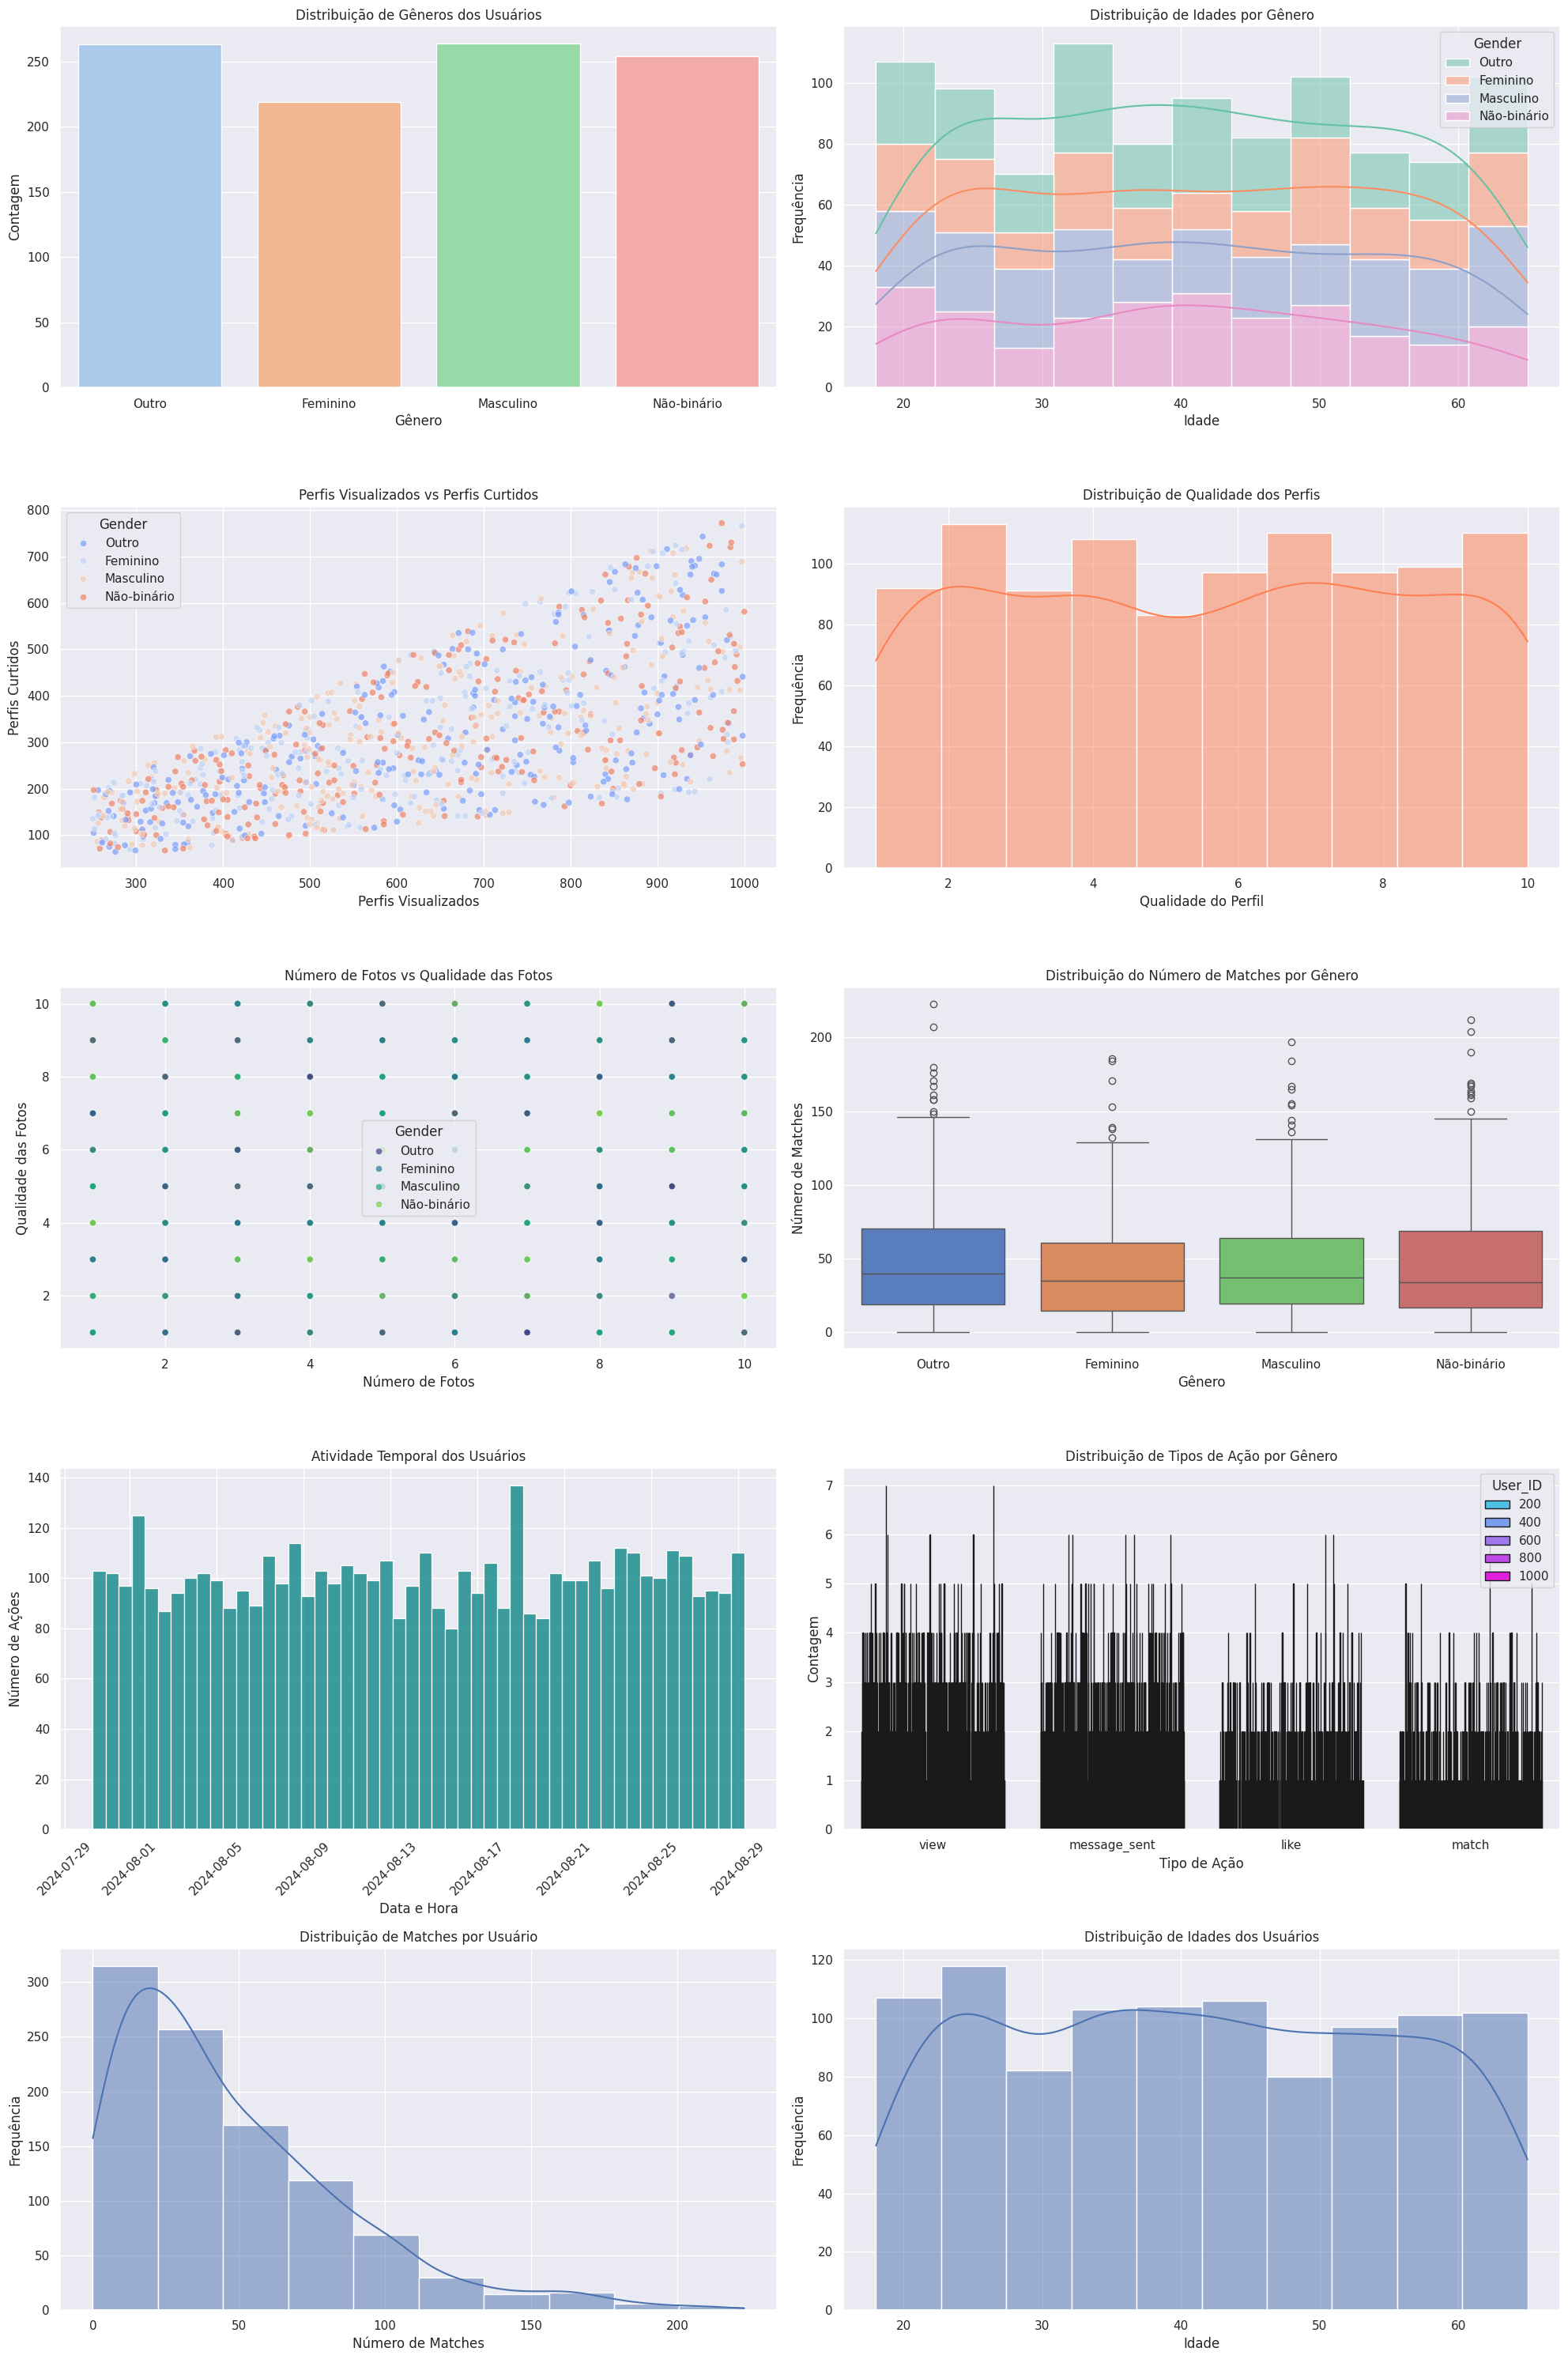

In [ ]:
# Definindo o tamanho da figura geral do dashboard
plt.figure(figsize=(20, 30))

# Distribuição de Gêneros dos Usuários
plt.subplot(5, 2, 1)
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Distribuição de Gêneros dos Usuários")
plt.xlabel("Gênero")
plt.ylabel("Contagem")

# Distribuição de Idades por Gênero
plt.subplot(5, 2, 2)
sns.histplot(data=df, x='Age', hue='Gender', multiple="stack", kde=True, palette='Set2')
plt.title("Distribuição de Idades por Gênero")
plt.xlabel("Idade")
plt.ylabel("Frequência")

# Número de Perfis Visualizados versus Perfis Curtidos
plt.subplot(5, 2, 3)
sns.scatterplot(data=df, x='Profiles_Viewed', y='Profiles_Liked', hue='Gender', palette='coolwarm', alpha=0.7)
plt.title("Perfis Visualizados vs Perfis Curtidos")
plt.xlabel("Perfis Visualizados")
plt.ylabel("Perfis Curtidos")

# Distribuição de Qualidade dos Perfis
plt.subplot(5, 2, 4)
sns.histplot(df['Profile_Quality'], bins=10, kde=True, color='coral')
plt.title("Distribuição de Qualidade dos Perfis")
plt.xlabel("Qualidade do Perfil")
plt.ylabel("Frequência")

# Número de Fotos vs Qualidade das Fotos
plt.subplot(5, 2, 5)
sns.scatterplot(data=df, x='Number_of_Photos', y='Photo_Quality', hue='Gender', palette='viridis', alpha=0.7)
plt.title("Número de Fotos vs Qualidade das Fotos")
plt.xlabel("Número de Fotos")
plt.ylabel("Qualidade das Fotos")

# Distribuição do Número de Matches por Gênero
plt.subplot(5, 2, 6)
sns.boxplot(data=df, x='Gender', y='Number_of_Matches', palette='muted')
plt.title("Distribuição do Número de Matches por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de Matches")

# Atividade Temporal dos Usuários
acoes_df['Timestamp'] = pd.to_datetime(acoes_df['Timestamp'])
plt.subplot(5, 2, 7)
sns.histplot(acoes_df['Timestamp'], bins=50, kde=False, color='teal')
plt.title("Atividade Temporal dos Usuários")
plt.xlabel("Data e Hora")
plt.ylabel("Número de Ações")
plt.xticks(rotation=45)

# Tipo de Ação Realizada por Gênero
plt.subplot(5, 2, 8)
sns.countplot(data=acoes_df, x='Action_Type', hue='User_ID', palette='cool', edgecolor='k')
plt.title("Distribuição de Tipos de Ação por Gênero")
plt.xlabel("Tipo de Ação")
plt.ylabel("Contagem")

# Visualizar a quantidade de likes e matches por usuário
plt.subplot(5, 2, 9)
sns.histplot(df['Number_of_Matches'], bins=10, kde=True)
plt.title("Distribuição de Matches por Usuário")
plt.xlabel("Número de Matches")
plt.ylabel("Frequência")

# Histograma de idades dos perfis
plt.subplot(5, 2, 10)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribuição de Idades dos Usuários")
plt.xlabel("Idade")
plt.ylabel("Frequência")

# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Exibir o dashboard
plt.show()

In [ ]:
# Visualizando Tabela
display(df)

,User_ID,Age,Gender,Location,Occupation,Education,Interests,Description_Length,Number_of_Photos,Photo_Types,...,Profile_Views,Profiles_Viewed,Profiles_Liked,Messages_Sent,Messages_Received,Response_Rate,Profiles_Liked_IDs,Profiles_Liked_By_Others_IDs,Matches_IDs,Number_of_Matches
0,1,33,Outro,Rio Branco,Médico,Ensino Fundamental,"Arte, Cinema",98,2,"Esportes, Eventos, Viagens",...,32,881,373,24,21,0.57,"[896, 399, 940, 632, 295, 658, 281, 772, 568, ...","[1, 5, 9, 10, 13, 14, 18, 19, 21, 25, 29, 41, ...",[1],1
1,2,21,Outro,Cuiabá,Médico,Ensino Fundamental,"Viagens, Arte, Tecnologia",181,8,Viagens,...,70,998,441,21,21,0.91,"[471, 958, 222, 803, 224, 504, 523, 905, 781, ...","[1, 6, 10, 11, 15, 16, 18, 23, 24, 37, 42, 44,...",[],0
2,3,27,Feminino,Porto Velho,Designer,Ensino Superior,Esportes,181,5,"Selfies, Paisagens, Viagens",...,49,798,434,12,26,0.61,"[475, 809, 957, 50, 161, 76, 616, 777, 719, 82...","[2, 5, 9, 10, 11, 14, 15, 19, 21, 27, 29, 32, ...",[],0
3,4,45,Masculino,São Luís,Engenheiro,Ensino Superior,"Cinema, Literatura",87,8,"Eventos, Pessoas, Esportes",...,70,893,466,26,13,0.74,"[633, 864, 841, 877, 523, 374, 827, 19, 479, 8...","[1, 3, 4, 6, 8, 9, 13, 14, 16, 17, 23, 25, 27,...",[4],1
4,5,46,Outro,Rio de Janeiro,Engenheiro,Ensino Médio,"Culinária, Esportes",162,7,Eventos,...,125,506,270,11,6,0.79,"[690, 53, 708, 36, 794, 85, 572, 752, 904, 959...","[3, 4, 8, 9, 10, 13, 19, 21, 25, 29, 33, 36, 3...",[3],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,23,Masculino,Belém,Médico,Ensino Superior,"Arte, Música",179,2,Pessoas,...,100,548,208,17,15,0.60,"[250, 400, 832, 772, 445, 971, 645, 936, 587, ...","[3, 7, 8, 9, 12, 14, 17, 19, 21, 22, 25, 29, 3...","[512, 770, 644, 388, 518, 646, 264, 390, 650, ...",64
996,997,54,Outro,Rio Branco,Médico,Ensino Superior,Literatura,100,2,Viagens,...,119,915,562,28,6,0.76,"[306, 209, 873, 882, 268, 217, 375, 275, 398, ...","[1, 3, 5, 8, 12, 15, 16, 21, 24, 25, 26, 29, 3...","[5, 517, 8, 520, 526, 15, 21, 25, 540, 29, 542...",176
997,998,52,Masculino,Porto Alegre,Médico,Ensino Superior,"Música, Esportes, Tecnologia",131,10,"Esportes, Eventos, Selfies",...,145,508,116,18,9,0.86,"[650, 283, 243, 313, 793, 667, 498, 892, 276, ...","[3, 4, 6, 9, 14, 15, 19, 21, 22, 32, 37, 40, 4...","[9, 915, 276, 918, 793, 667, 412, 927, 161, 37...",39
998,999,42,Feminino,Rio Branco,Médico,Ensino Superior,Literatura,141,3,"Paisagens, Eventos, Pessoas",...,149,468,232,23,27,0.52,"[312, 95, 35, 771, 574, 680, 499, 429, 114, 15...","[2, 3, 6, 7, 9, 14, 16, 19, 24, 31, 34, 37, 45...","[384, 771, 516, 259, 6, 903, 776, 650, 906, 78...",72


# Dating Assistant

In [ ]:
def dating_assistant(user_profile, target_profile):
    suggestions = []

    # Analisando Idade
    user_age = user_profile['Age']
    preferred_age_range = target_profile['Preferred_Age']

    if '-' in preferred_age_range:
        age_min, age_max = preferred_age_range.split('-')
        age_min = int(age_min)
        age_max = int(age_max) if age_max.isdigit() else float('inf')
    elif preferred_age_range.endswith('+'):  # Handle open-ended like '60+'
        age_min = int(preferred_age_range[:-1])  # Extract the number before '+'
        age_max = float('inf')
    else:
        age_min = int(preferred_age_range)
        age_max = age_min  # If it's a single number, min and max are the same

    if not (age_min <= user_age <= age_max):
        suggestions.append(f"Considere ajustar sua idade (atual: {user_age}) para se alinhar melhor com a faixa etária preferida pelo alvo ({preferred_age_range}).")

    # Analisando Gênero
    user_gender = user_profile['Gender']
    preferred_gender = target_profile['Preferred_Gender']

    if user_gender != preferred_gender:
        suggestions.append(f"O alvo pode preferir outro gênero ({preferred_gender}). Considere ajustar isso se for relevante para você.")

    # Analisando Localização
    user_location = user_profile['Location']
    preferred_location = target_profile['Preferred_Location']

    if user_location != preferred_location:
        suggestions.append(f"Considere ajustar sua localização para algo mais próximo da localização preferida pelo alvo ({preferred_location}).")

    # Analisando Tipos de Foto
    user_photo_types = user_profile['Photo_Types'].split(', ')
    preferred_photo_types = target_profile['Preferred_Photo_Types'].split(', ')

    missing_photo_types = set(preferred_photo_types) - set(user_photo_types)
    if missing_photo_types:
        suggestions.append(f"Considere adicionar fotos de tipos preferidos pelo alvo: {', '.join(missing_photo_types)}.")

    # Analisando Interesses
    user_interests = set(user_profile['Interests'].split(', '))
    target_interests = set(target_profile['Interests'].split(', '))

    shared_interests = user_interests & target_interests
    missing_interests = target_interests - user_interests

    if not shared_interests:
        suggestions.append(f"Tente incluir interesses que o alvo possui: {', '.join(missing_interests)}.")
    else:
        suggestions.append(f"Enfatize interesses compartilhados no seu perfil: {', '.join(shared_interests)}.")

    # Analisando Qualidade do Perfil
    user_profile_quality = user_profile['Profile_Quality']
    if user_profile_quality < 7:
        suggestions.append(f"Considere melhorar a qualidade geral do seu perfil. Atividades sugeridas incluem: aumentar a qualidade das fotos, expandir a descrição pessoal e completar mais seções do perfil.")

    # Analisando a Qualidade das Fotos
    user_photo_quality = user_profile['Photo_Quality']
    if user_photo_quality < 7:
        suggestions.append(f"Considere melhorar a qualidade das fotos no seu perfil, por exemplo, usando fotos com melhor iluminação ou mais nitidez.")

    if suggestions:
        print("Sugestões para melhorar as chances de match com o alvo:")
        for suggestion in suggestions:
            print(f"- {suggestion}")
    else:
        print("Seu perfil já está bem alinhado com as preferências do alvo!")

In [ ]:
# Função para obter o ID do usuário
def obter_id_usuario():
    user_input = input("Digite o ID do usuário (deixe em branco para aleatório): ")

    if user_input:
        try:
            user_id = int(user_input)
            if user_id < 1 or user_id > len(df):
                raise ValueError("ID fora do intervalo.")
        except ValueError:
            print("ID inválido. Selecionando um ID aleatório.")
            user_id = random.randint(1, len(df))
    else:
        user_id = random.randint(1, len(df))

    return user_id

In [ ]:
# Exemplo de uso
user_id  = obter_id_usuario()
target_id  = obter_id_usuario()
print(f"ID do usuário selecionado: {user_id}")
print(f"ID do usuário target: {target_id}")

# Searching for User andTarget profiles
user_profile = df.loc[user_id].to_dict()  # Get user profile as dictionary
target_profile = df.loc[target_id].to_dict()  # Get target profile as dictionary

user_name = user_profile.get('Name', 'Usuário Desconhecido') # Extract the name, handle missing names

# Avaliar perfil do usuário
print(f"Recomendações para o usuário {user_name}:")
dating_assistant(user_profile, target_profile)

Digite o ID do usuário (deixe em branco para aleatório): 150
Digite o ID do usuário (deixe em branco para aleatório): 
ID do usuário selecionado: 150
Recomendações para o usuário Usuário Desconhecido:
Sugestões para melhorar as chances de match com o alvo:
- Considere ajustar sua idade (atual: 55) para se alinhar melhor com a faixa etária preferida pelo alvo (18-20).
- Considere ajustar sua localização para algo mais próximo da localização preferida pelo alvo (Salvador).
- Considere adicionar fotos de tipos preferidos pelo alvo: Selfies.
- Tente incluir interesses que o alvo possui: Viagens.


# Analise de correlacao

In [ ]:
def analise_correlacao(df, metodo='pearson', plot=True):
    """
    Calcula a correlação entre as variáveis de um DataFrame e, opcionalmente, exibe um heatmap.

    Parâmetros:
    df (pd.DataFrame): DataFrame com os dados.
    metodo (str): Método de correlação ('pearson', 'spearman', 'kendall'). Padrão é 'pearson'.
    plot (bool): Se True, exibe um heatmap da matriz de correlação. Padrão é True.

    Retorna:
    pd.DataFrame: Matriz de correlação.
    """

    # Calculando a matriz de correlação
    corr = df.corr(method=metodo)

    # Exibindo a matriz de correlação
    print("Matriz de Correlação:")
    print(corr)

    # Visualizando o heatmap
    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
                    vmin=-1, vmax=1, linewidths=0.5, square=True)
        plt.title(f'Matriz de Correlação ({metodo.capitalize()})', size=16)
        plt.show()

    return corr

In [ ]:
# Suponha que você tenha um DataFrame chamado 'df'
df_numerico = df.select_dtypes(include=[np.number])

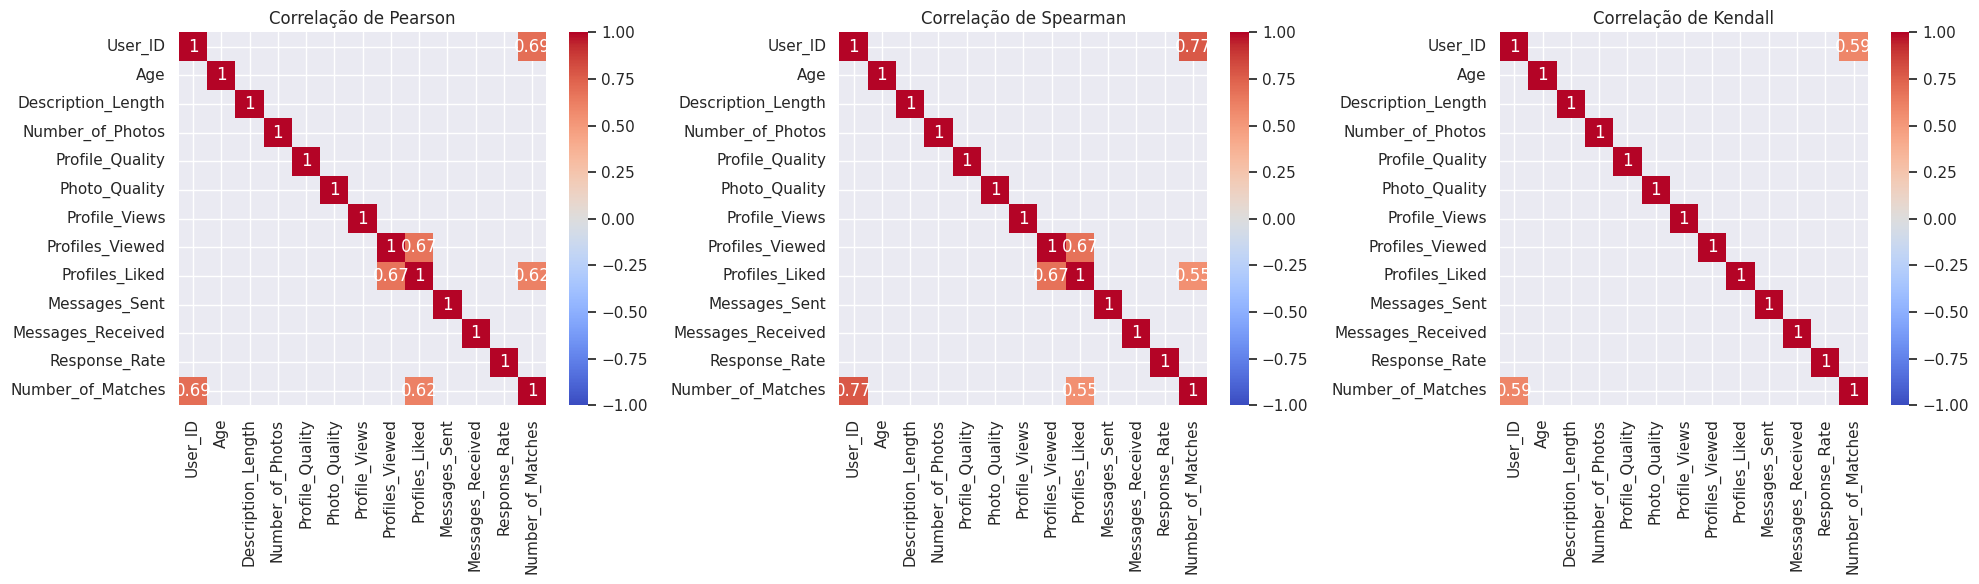

In [ ]:
# Calcula a correlação usando os três métodos
correlacao_pearson = df_numerico.corr(method='pearson')
correlacao_spearman = df_numerico.corr(method='spearman')
correlacao_kendall = df_numerico.corr(method='kendall')

# Função para filtrar correlações
def filtrar_correlacao(correlacao, limite_inferior=0.5):
    correlacao_filtrada = correlacao.copy()
    correlacao_filtrada[(correlacao < limite_inferior) & (correlacao > -limite_inferior)] = np.nan
    return correlacao_filtrada

# Filtrando as correlações com valores > 0.5 ou < -0.5
correlacao_pearson_filtrada = filtrar_correlacao(correlacao_pearson)
correlacao_spearman_filtrada = filtrar_correlacao(correlacao_spearman)
correlacao_kendall_filtrada = filtrar_correlacao(correlacao_kendall)

# Configura o tamanho da figura para que os gráficos fiquem lado a lado
plt.figure(figsize=(20, 6))

# Pearson
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, gráfico 1
sns.heatmap(correlacao_pearson_filtrada, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação de Pearson')

# Spearman
plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, gráfico 2
sns.heatmap(correlacao_spearman_filtrada, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação de Spearman')

# Kendall
plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, gráfico 3
sns.heatmap(correlacao_kendall_filtrada, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação de Kendall')

# Exibe os gráficos
plt.tight_layout()
plt.show()

# Cleaning the Table

In [ ]:
# Rodar para zerar o DataFrame
df = pd.DataFrame(columns=df.columns)
display(df)

acoes_df = pd.DataFrame(columns=acoes_df.columns)
display(acoes_df)